# K Mean

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
plt.style.use('seaborn-v0_8-white')

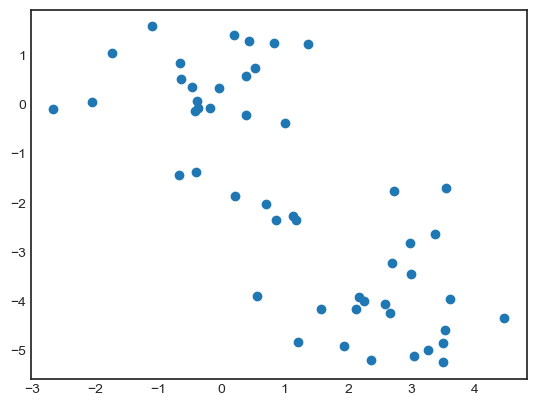

In [2]:
 # Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4
plt.scatter(X[:,0],X[:,1])
plt.show()

In [3]:
km = KMeans(n_clusters=2, n_init=20)
km.fit(X)
km.labels_

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

In [4]:
m=km.cluster_centers_
print(m)

[[-0.23940153  0.14703307]
 [ 2.53287159 -3.80815122]]


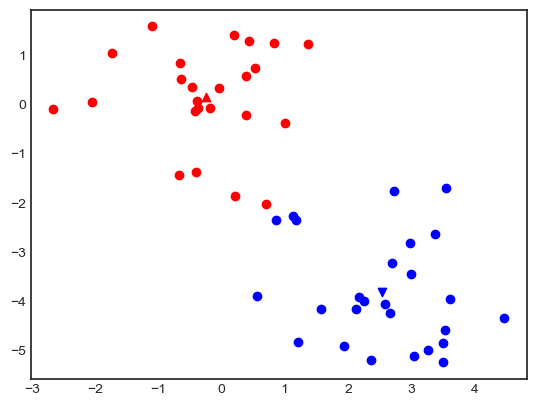

In [6]:
C1 = km.labels_ == 0
C2 = km.labels_ == 1
plt.scatter(X[C1, 0], X[C1, 1], c='red')
plt.scatter(X[C2, 0], X[C2, 1], c='blue')
plt.scatter(m[0][0], m[0][1], c='red', marker='^')
plt.scatter(m[1][0], m[1][1], c='blue', marker='v')
plt.show()

In [7]:
km3 = KMeans(n_clusters=3, n_init=20)
km3.fit(X)
km3.labels_

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2], dtype=int32)

In [8]:
m=km3.cluster_centers_
print(m)

[[ 2.82805911 -4.11351797]
 [-0.27876523  0.51224152]
 [ 0.69945422 -2.14934345]]


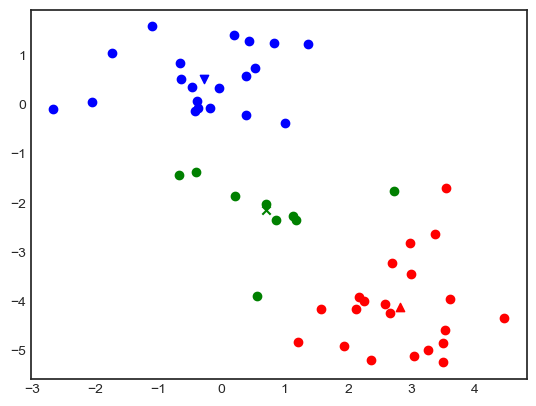

In [9]:
C1 = km3.labels_ == 0
C2 = km3.labels_ == 1
C3 = km3.labels_ == 2

plt.scatter(X[C1, 0], X[C1, 1], c='red')
plt.scatter(X[C2, 0], X[C2, 1], c='blue')
plt.scatter(X[C3, 0], X[C3, 1], c='green')

plt.scatter(m[0][0], m[0][1], c='red', marker='^')
plt.scatter(m[1][0], m[1][1], c='blue', marker='v')
plt.scatter(m[2][0], m[2][1], c='green', marker='x')

plt.show()


# Thuật toán cụm bằng phân tầng


In [10]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
%matplotlib inline
plt.style.use('seaborn-v0_8-white')


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

USArrests = pd.read_csv('Downloads/USArrests.csv', index_col=0)

sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(USArrests),
                 index=USArrests.index,
                 columns=USArrests.columns)


In [14]:
X.shape

(50, 4)

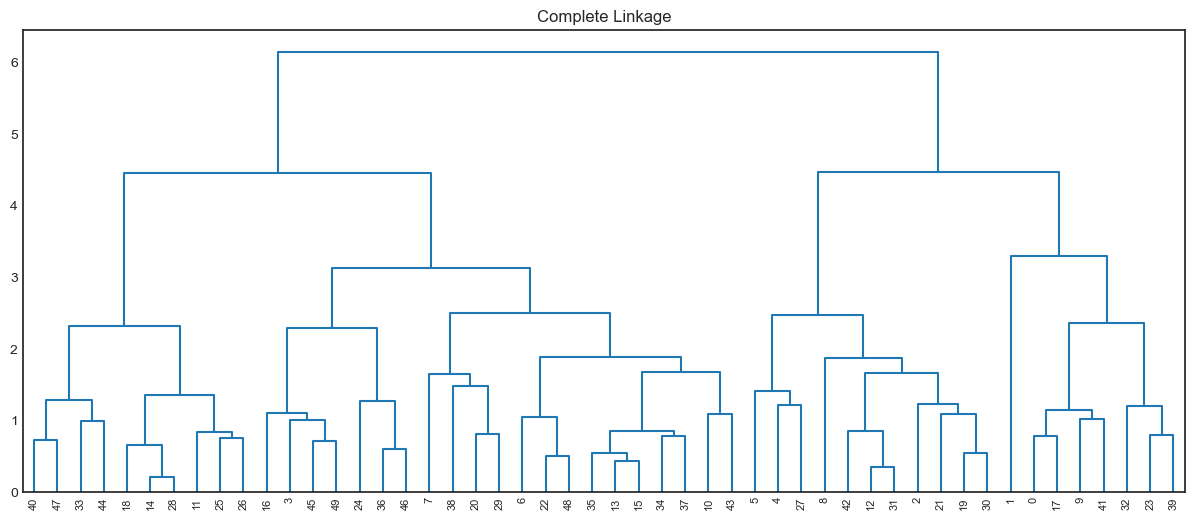

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
linkage = hierarchy.complete(X)
cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)

plt.title('Complete Linkage')
plt.show()

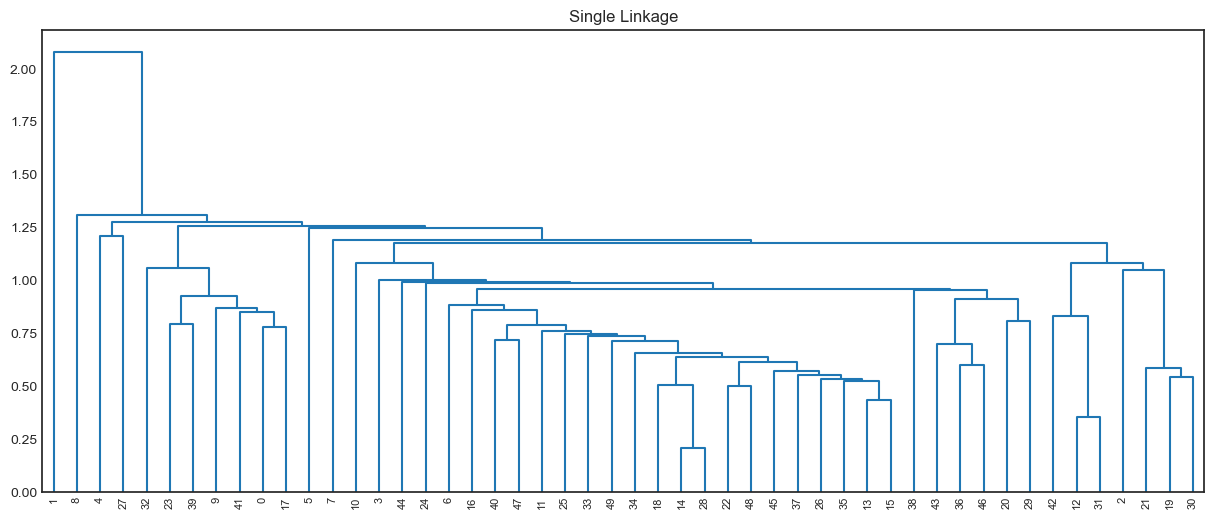

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
linkage = hierarchy.single(X)
cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)
plt.title('Single Linkage')
plt.show()

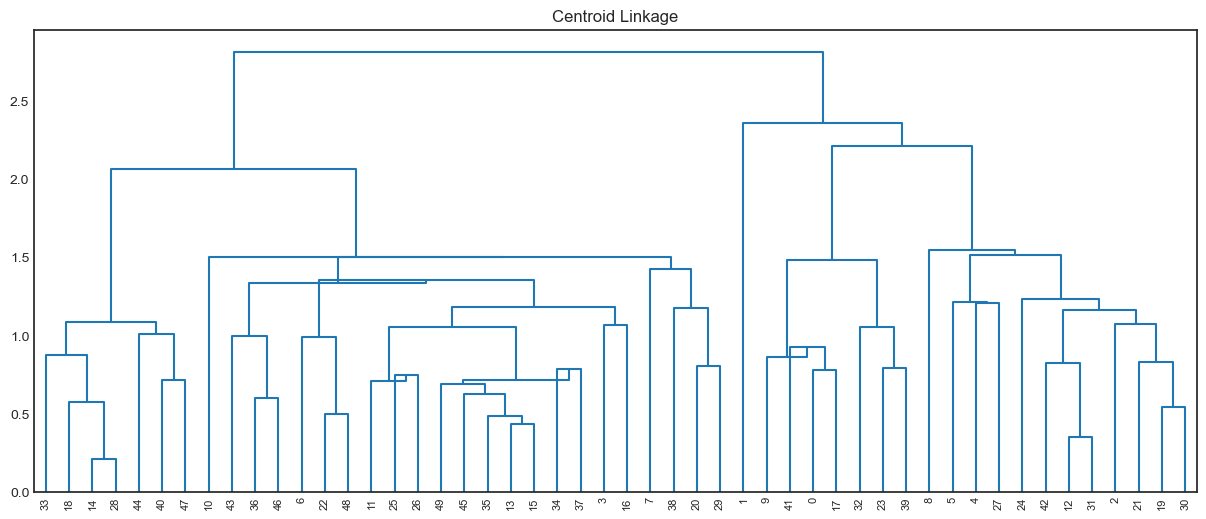

In [23]:

fig, ax = plt.subplots(1, 1, figsize=(15, 6))
linkage = hierarchy.centroid(X)
cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)

plt.title('Centroid Linkage')
plt.show()


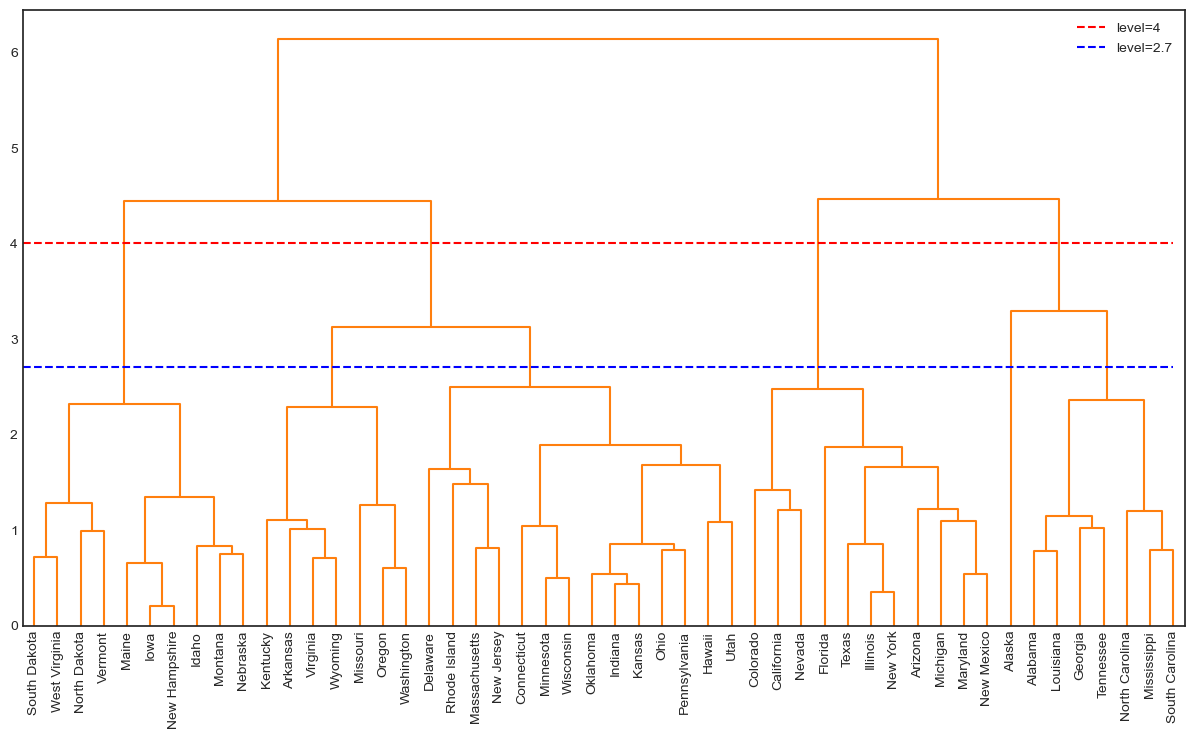

In [24]:

plt.figure(figsize=(15, 8))

cut = hierarchy.dendrogram(
    hierarchy.complete(X),
    labels=X.index,
    color_threshold=140,
    leaf_font_size=10
)

plt.hlines(4.0, 0, plt.gca().xaxis.get_data_interval()[1],
           colors='r', linestyles='dashed', label='level=4')
plt.hlines(2.7, 0, plt.gca().xaxis.get_data_interval()[1],
           colors='blue', linestyles='dashed', label='level=2.7')

plt.legend()
plt.show()


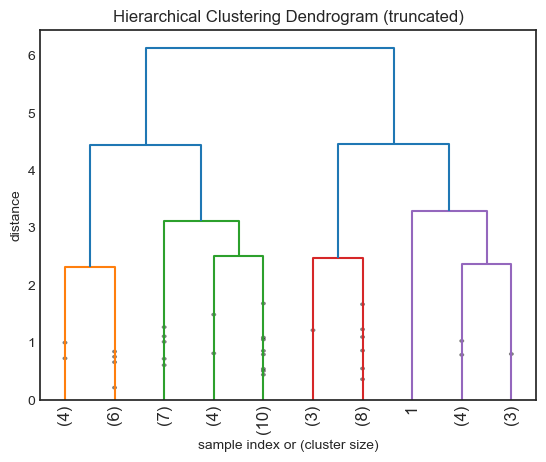

In [26]:

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

hierarchy.dendrogram(
    hierarchy.complete(X),
    truncate_mode='lastp',
    p=10,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)

plt.show()


In [27]:
Z=hierarchy.complete(X)
Z[:5]

array([[14.        , 28.        ,  0.2079438 ,  2.        ],
       [12.        , 31.        ,  0.35377437,  2.        ],
       [13.        , 15.        ,  0.43312429,  2.        ],
       [22.        , 48.        ,  0.49909939,  2.        ],
       [35.        , 52.        ,  0.53571007,  3.        ]])

In [28]:
print(Z[:,2].min(),Z[:,2].max())

0.2079437976133826 6.138334936847244


In [30]:
clusters = fcluster(Z, t=4, criterion='distance')

# Phương pháp học máy không giám sát

## Phương pháp phân tích thành phần chính

In [32]:
import pandas as pd
import numpy as np
from numpy.linalg import svd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
plt.style.use('seaborn-v0_8-white')

In [35]:
USArrests = pd.read_csv('Downloads/USArrests.csv', index_col=0)

# Chuẩn hóa dữ liệu
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(USArrests),
                 index=USArrests.index,
                 columns=USArrests.columns)

In [36]:
pca_loadings = pd.DataFrame(
    PCA().fit(X).components_.T,
    index=USArrests.columns,
    columns=['V1', 'V2', 'V3', 'V4']
)

pca_loadings

,V1,V2,V3,V4
Murder,0.535899,-0.418181,-0.341233,-0.649228
Assault,0.583184,-0.187986,-0.268148,0.743407
UrbanPop,0.278191,0.872806,-0.378016,-0.133878
Rape,0.543432,0.167319,0.817778,-0.089024


In [37]:


# Thực hiện PCA và tạo DataFrame kết quả
pca = PCA()
df_plot = pd.DataFrame(
    pca.fit_transform(X),
    columns=['PC1', 'PC2', 'PC3', 'PC4'],
    index=X.index
)

df_plot.head()


,PC1,PC2,PC3,PC4
Alabama,0.985566,-1.133392,-0.444269,-0.156267
Alaska,1.950138,-1.073213,2.040003,0.438583
Arizona,1.763164,0.745957,0.054781,0.834653
Arkansas,-0.141420,-1.119797,0.114574,0.182811
California,2.523980,1.542934,0.598557,0.341996


C:\Users\admin\AppData\Local\Temp\ipykernel_8600\2504549188.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pca_loadings.V1[i],
C:\Users\admin\AppData\Local\Temp\ipykernel_8600\2504549188.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  -pca_loadings.V2[i],


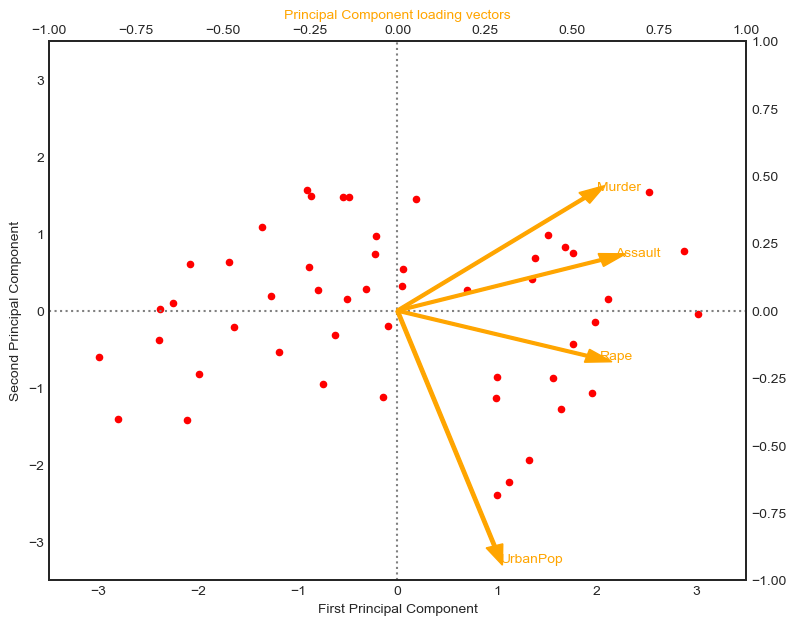

In [40]:
fig, ax1 = plt.subplots(figsize=(9, 7))
ax1.set_xlim(-3.5, 3.5)
ax1.set_ylim(-3.5, 3.5)

# Vẽ scatter plot của các điểm PCA
df_plot.plot.scatter('PC1', 'PC2', c='red', ax=ax1)

# Vẽ các đường tham chiếu
ax1.hlines(0, -3.5, 3.5, linestyles='dotted', colors='grey')
ax1.vlines(0, -3.5, 3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Vẽ các vector loading trên trục phụ
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1, 1)
ax2.set_xlim(-1, 1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Vẽ nhãn cho các vector
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i,
                 (pca_loadings.V1.loc[i] * a, -pca_loadings.V2.loc[i] * a),
                 color='orange')

# Vẽ các vector loading
for i in range(len(pca_loadings)):
    ax2.arrow(0, 0,
              pca_loadings.V1[i],
              -pca_loadings.V2[i],
              color='orange',
              width=0.01,
              head_width=0.05)

plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_8600\1321424470.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0, 0, pca_loadings.V1[0], -pca_loadings.V2[0])
C:\Users\admin\AppData\Local\Temp\ipykernel_8600\1321424470.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0, 0, pca_loadings.V1[1], -pca_loadings.V2[1])
C:\Users\admin\AppData\Local\Temp\ipykernel_8600\1321424470.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

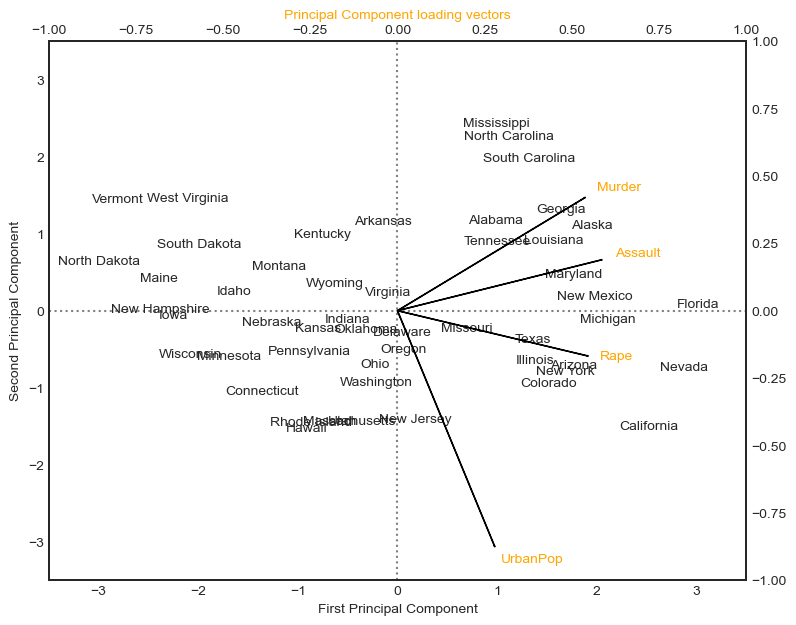

In [41]:
fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# plot reference lines
ax1.hlines(0, -3.5, 3.5, linestyles='dotted', colors='grey')
ax1.vlines(0, -3.5, 3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# plot Principal Component loading vectors, using a second yaxis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1, 1)
ax2.set_xlim(-1, 1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i] * a, -pca_loadings.V2.loc[i] * a), color='orange')

# plot vectors
ax2.arrow(0, 0, pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0, 0, pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0, 0, pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0, 0, pca_loadings.V1[3], -pca_loadings.V2[3])

plt.show()


In [42]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[2.53085875 1.00996444 0.36383998 0.17696948]
[0.62006039 0.24744129 0.0891408  0.04335752]


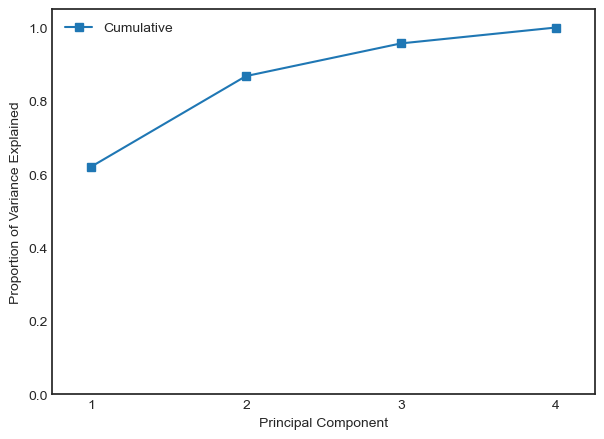

In [43]:
plt.figure(figsize=(7, 5))
plt.plot([1, 2, 3, 4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75, 4.25)
plt.ylim(0, 1.05)
plt.xticks([1, 2, 3, 4])
plt.legend(loc=2)
plt.show()


## Xử lý dữ liệu bị mất

In [44]:
import pandas as pd
import numpy as np
from numpy.linalg import svd

In [45]:
n = 3
known_value_indices = tuple(zip(*[[0, 0], [0, 2], [1, 1], [2, 0], [2, 1]]))
known_values = [1.0, 1.9, 0.8, 3.2, 5.9]


In [46]:
X = np.empty((n, n))
X[:] = np.nan
X[known_value_indices]=known_values

In [48]:
X

array([[1. , nan, 1.9],
       [nan, 0.8, nan],
       [3.2, 5.9, nan]])

In [50]:
df = pd.DataFrame(X)
col_means = df.apply(np.mean, 0)
X_t=df.fillna(value=col_means).values
X_t

array([[1.  , 3.35, 1.9 ],
       [2.1 , 0.8 , 1.9 ],
       [3.2 , 5.9 , 1.9 ]])

In [51]:
u, s, vh = svd(X_t, full_matrices=False)
u.shape, s.shape, vh.shape

((3, 3), (3,), (3, 3))

In [52]:
k = 2
recovered = np.dot(u[:, :k] * s[:k,], vh[:k,:])

In [53]:
recovered[known_value_indices]

array([1.5972546 , 1.2579891 , 0.79994274, 2.86665276, 5.92470515])

In [54]:
np.mean((known_values-recovered[known_value_indices])**2)

np.float64(0.1761243585230458)

In [56]:
def Matrix_Completion(X_t,Omega,values,k):
    u, s, vh = svd(X_t, full_matrices=False)
    X_r = np.dot(u[:, :k] * s[:k,], vh[:k,:])
    values_r=X_r[Omega]
    E=np.mean((values-values_r)**2)
    return X_r,E

In [57]:
X_r,E=Matrix_Completion(X_t,known_value_indices,known_values,k=2)
X_r[known_value_indices]=known_values
X_r

array([[1.        , 3.30573604, 1.9       ],
       [2.10077263, 0.8       , 1.89916947],
       [3.2       , 5.9       , 2.25832719]])

In [58]:
for i in range(100):
    X_r, E = Matrix_Completion(X_t, known_value_indices, known_values, k=2)
    X_r[known_value_indices] = known_values
    X_t = X_r


In [59]:
print(X_r)

[[1.         3.70566923 1.9       ]
 [2.45110718 0.8        1.30751011]
 [3.2        5.9        3.67056254]]


In [60]:
print(E)

2.761013168273541e-31


In [61]:
N = 2000
n = 100
r = 4
X=np.random.randn(n,n)
# Sample N=2000 random indices
Omega = np.random.choice(n*n, size=N, replace=False)
Omega = np.unravel_index(Omega, X.shape)
y = X[Omega]

In [62]:
df = pd.DataFrame(X)
col_means = df.apply(np.mean, 0)
X_t=df.fillna(value=col_means).values
X_t.shape

(100, 100)

In [63]:
X_r,E=Matrix_Completion(X_t,Omega,y,k=2)
X_r[Omega]=y
X_r.shape

(100, 100)

In [65]:
for i in range(100):
    X_r,E=Matrix_Completion(X_t,Omega,y,k=2)
    X_r[Omega]=y
    X_t=X_r

In [66]:
print(E)

0.6246099615187449
